In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_parquet ("../data/reservas_hoteles.parquet")

In [38]:
df = df_raw.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_reserva       15098 non-null  object 
 1   id_cliente       15098 non-null  object 
 2   nombre           15098 non-null  object 
 3   apellido         15098 non-null  object 
 4   mail             15098 non-null  object 
 5   competencia      15098 non-null  bool   
 6   fecha_reserva    15098 non-null  object 
 7   inicio_estancia  15023 non-null  object 
 8   final_estancia   15023 non-null  object 
 9   id_hotel         15098 non-null  int64  
 10  precio_noche     9874 non-null   float64
 11  nombre_hotel     15098 non-null  object 
 12  estrellas        9926 non-null   float64
 13  ciudad           15098 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [4]:
df.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid


In [5]:
df[["fecha_reserva","inicio_estancia", "final_estancia"]] = df[["fecha_reserva","inicio_estancia", "final_estancia"]].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15098 non-null  object        
 1   id_cliente       15098 non-null  object        
 2   nombre           15098 non-null  object        
 3   apellido         15098 non-null  object        
 4   mail             15098 non-null  object        
 5   competencia      15098 non-null  bool          
 6   fecha_reserva    9926 non-null   datetime64[ns]
 7   inicio_estancia  15023 non-null  datetime64[ns]
 8   final_estancia   15023 non-null  datetime64[ns]
 9   id_hotel         15098 non-null  int64         
 10  precio_noche     9874 non-null   float64       
 11  nombre_hotel     15098 non-null  object        
 12  estrellas        9926 non-null   float64       
 13  ciudad           15098 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64

In [7]:
df ["nombre_hotel"].value_counts()

nombre_hotel
                          5172
Hotel Sol y Luna           559
Hotel Monte Verde          552
Hotel Luz de Madrid        541
Hotel Los Almendros        539
Hotel Brisas del Mar       538
Hotel Mirador Real         536
Hotel Puerta del Cielo     531
Hotel Camino del Sol       524
Gran Hotel Madrid          523
Hotel Las Estrellas        522
Hotel Costa Azul           521
Hotel Vista Alegre         520
Hotel Encanto Real         518
Palacio del Sol            516
Hotel Torre Dorada         515
Hotel Rincón Sereno        515
Hotel Jardines del Rey     510
Hotel Maravilla Real       477
Hotel Palacio Imperial     469
Name: count, dtype: int64

In [8]:
df ["id_hotel"].value_counts()

id_hotel
28     565
6      550
13     549
36     546
38     540
14     537
114    537
2      536
27     536
103    533
128    530
48     525
131    524
186    522
40     521
15     520
135    518
19     516
113    515
194    511
35     511
33     511
49     510
3      503
47     502
181    493
43     489
117    489
29     459
Name: count, dtype: int64

In [9]:
df ["nombre_hotel"].nunique()

20

In [10]:
df ["id_hotel"].nunique()

29

In [6]:
df_competencia = df[(df["competencia"] == True)]
df_competencia.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,443a7307-2183-4051-b0bb-26f12fc1f478,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,
9,458029ad-cc9b-4d85-8290-fec170bcc02d,e1a34338-a0aa-4b0e-96de-55f884eeb074,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,2949fb90-39ab-4613-b4c1-e238bb56faf3,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,


In [7]:
df_competencia.loc[:,"inicio_estancia"] = df_competencia["inicio_estancia"].fillna("2025-03-01")
df_competencia.loc[:,"inicio_estancia"] = df_competencia["final_estancia"].fillna("2025-03-02")

In [4]:
df_propios = df[(df["competencia"] == False)]
df_propios.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
5,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,df42ae3d-0b9b-4c06-b22e-939323833ef8,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,36,85.45,Hotel Puerta del Cielo,5.0,Madrid
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,a16a9d83-6888-4947-a7ab-ed41203e347c,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,43,309.80,Hotel Encanto Real,1.0,Madrid


In [40]:
df_propios_unicos = df_propios [["nombre_hotel"]].drop_duplicates().reset_index(drop=True)
df_propios_unicos ["id_hotel"] = range(1,len(df_propios_unicos)+1)
df_propios_unicos = df_propios_unicos.set_index("nombre_hotel")["id_hotel"]
df_propios_unicos.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, Hotel Monte Verde to Hotel Maravilla Real
Series name: id_hotel
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


In [41]:
hoteles_unicos = df ["nombre_hotel"].unique()

ValueError: List of boxplot statistics and `positions` values must have same the length

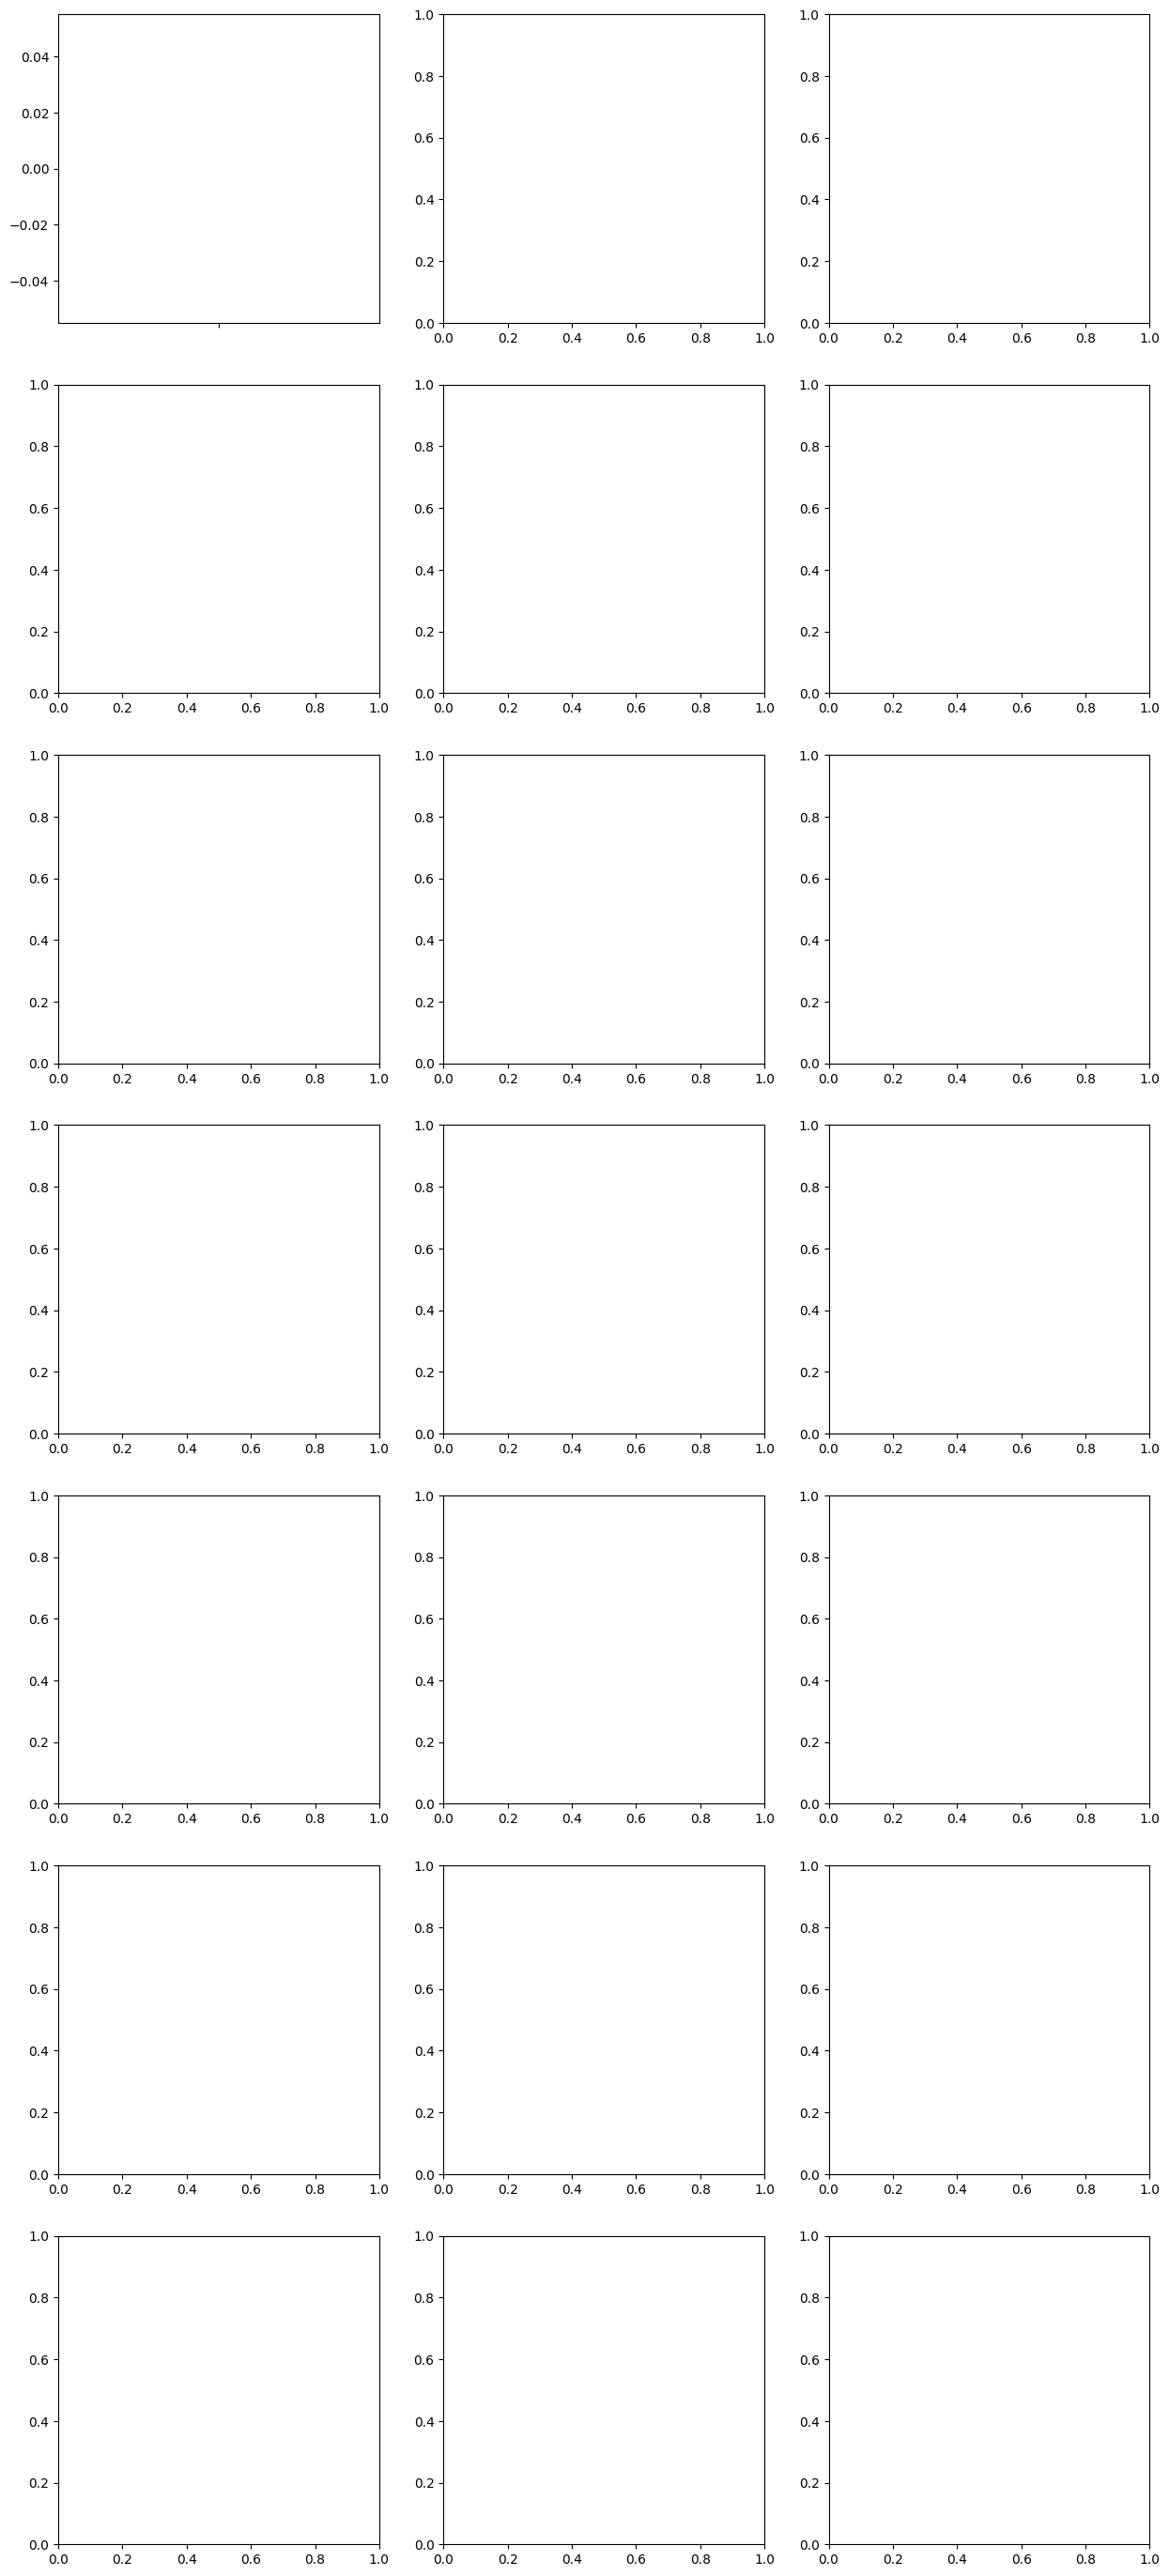

In [42]:
# Definir la cantidad de columnas por fila
cols_per_row = 3
num_hoteles = len(hoteles_unicos)
num_rows = (num_hoteles // cols_per_row) + (num_hoteles % cols_per_row > 0)  # Calcular filas necesarias

# Crear subplots dinámicamente
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

# Asegurar que axes es un array 2D
axes = np.array(axes).reshape(num_rows, cols_per_row)

# Dibujar los boxplots en cada subplot
for i, col in enumerate(hoteles_unicos):
    df_hotel = df[df["nombre_hotel"] == col]  
    row, col_idx = divmod(i, cols_per_row)
    sns.boxplot(y=df_hotel["precio_noche"], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')

In [20]:
precio_medio = df_propios.groupby ("nombre_hotel")["precio_noche"].mean().round(2)
precio_medio

nombre_hotel
Gran Hotel Madrid         264.20
Hotel Brisas del Mar      275.01
Hotel Camino del Sol      270.07
Hotel Costa Azul          285.18
Hotel Encanto Real        278.18
Hotel Jardines del Rey    273.76
Hotel Las Estrellas       271.28
Hotel Los Almendros       273.31
Hotel Luz de Madrid       270.14
Hotel Maravilla Real      283.86
Hotel Mirador Real        273.59
Hotel Monte Verde         276.09
Hotel Palacio Imperial    272.36
Hotel Puerta del Cielo    280.24
Hotel Rincón Sereno       277.30
Hotel Sol y Luna          268.02
Hotel Torre Dorada        272.98
Hotel Vista Alegre        280.53
Palacio del Sol           282.34
Name: precio_noche, dtype: float64

In [21]:
valoracion_media = df_propios.groupby ("nombre_hotel")["estrellas"].mean().round(2)
valoracion_media

nombre_hotel
Gran Hotel Madrid         3.06
Hotel Brisas del Mar      3.09
Hotel Camino del Sol      3.07
Hotel Costa Azul          3.11
Hotel Encanto Real        3.02
Hotel Jardines del Rey    2.95
Hotel Las Estrellas       2.90
Hotel Los Almendros       3.01
Hotel Luz de Madrid       3.05
Hotel Maravilla Real      2.97
Hotel Mirador Real        2.98
Hotel Monte Verde         3.10
Hotel Palacio Imperial    3.01
Hotel Puerta del Cielo    3.03
Hotel Rincón Sereno       3.00
Hotel Sol y Luna          3.01
Hotel Torre Dorada        2.92
Hotel Vista Alegre        2.94
Palacio del Sol           2.99
Name: estrellas, dtype: float64

In [22]:
df.loc[(df["competencia"] == False), "precio_noche"] = df["nombre_hotel"].map(precio_medio)
df.loc[(df["competencia"] == False), "estrellas"] = df["nombre_hotel"].map(valoracion_media)
df.loc[(df["competencia"] == False), "id_hotel"] = df["nombre_hotel"].map(df_propios_unicos)
df

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,1,276.09,Hotel Monte Verde,3.10,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,275.01,Hotel Brisas del Mar,3.09,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,270.07,Hotel Camino del Sol,3.07,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,8,271.28,Hotel Las Estrellas,2.90,Madrid
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,9,264.20,Gran Hotel Madrid,3.06,Madrid
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,7,273.76,Hotel Jardines del Rey,2.95,Madrid
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,11,272.36,Hotel Palacio Imperial,3.01,Madrid


In [25]:
df_clientes_unicos = df [["mail"]].drop_duplicates().reset_index(drop=True)
df_clientes_unicos ["id_cliente"] = range(1,len(df_clientes_unicos)+1)
df_clientes_unicos = df_clientes_unicos.set_index("mail")["id_cliente"]
df_clientes_unicos


mail
feliciana.cantón@example.com        1
leonardo.hierro@example.com         2
maite.calatayud@example.com         3
tecla.bonet@example.com             4
amílcar.andrés@example.com          5
                                ...  
lorena.román@example.com        14901
toño.narváez@example.com        14902
nadia.verdugo@example.com       14903
custodia.marco@example.com      14904
brígida.salom@example.com       14905
Name: id_cliente, Length: 14905, dtype: int64

In [31]:
df["id_cliente"] = df ["mail"].map(df_clientes_unicos)
df

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,1,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,2,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,3,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,1,276.09,Hotel Monte Verde,3.10,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,4,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,275.01,Hotel Brisas del Mar,3.09,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,5,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,270.07,Hotel Camino del Sol,3.07,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,3320,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,8,271.28,Hotel Las Estrellas,2.90,Madrid
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,12211,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,9,264.20,Gran Hotel Madrid,3.06,Madrid
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,7155,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,7,273.76,Hotel Jardines del Rey,2.95,Madrid
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,13302,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,11,272.36,Hotel Palacio Imperial,3.01,Madrid


In [32]:
df.to_parquet("../data/dataset_hoteles_limpio.parquet", index=False)